# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

> **IMPORTANT NOTE:** This notebook was AI-generated and has not been fully verified. Exercise caution when interpreting the code and results presented here. Some aspects of the data loading or analysis may require additional validation.

## Overview

This notebook explores Dandiset 001195, titled "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State". This dataset contains neurophysiological recordings from the dorsal raphe nucleus (DRN) and its projections to different brain regions, examining how these circuits contribute to aspects of loneliness-like states in mice.

The Dandiset can be accessed at: [https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

In this notebook, we will:
1. Load and explore the Dandiset metadata
2. Examine the structure of intracellular electrophysiology (patch-clamp) data
3. Visualize example patch-clamp recordings
4. Explore calcium imaging data from DRN projections to the Central Amygdala (CeA)
5. Visualize calcium imaging data and ROIs
6. Demonstrate how to work with behavior video data associated with the calcium imaging

## Required Packages

The following packages are required to run this notebook. We assume these are already installed in your environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import islice
from datetime import datetime

# For accessing data from the DANDI Archive
from dandi.dandiapi import DandiAPIClient

# For working with NWB files
import h5py
import pynwb
import remfile

# For displaying images and videos
from IPython.display import display, HTML, Video

# Set up some plotting parameters
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 8)
sns.set_theme()

## Connecting to DANDI and Loading the Dandiset

We'll start by connecting to the DANDI archive and retrieving metadata about Dandiset 001195.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Get basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset ID: {metadata['identifier']}")
print(f"Dandiset Name: {metadata['name']}")
print(f"Dandiset Version: {metadata['version']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Citation: {metadata['citation']}")

Dandiset ID: DANDI:001195
Dandiset Name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset Version: 0.250408.1733
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Citation: Keyes, Laurel; Lee, Christopher R.; Wichmann, Romy; Matthews, Gillian A. ; Tye, Kay M.  (2025) Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State (Version 0.250408.1733) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001195/0.250408.1733


Let's examine the keywords and subject areas to better understand the focus of this Dandiset.

In [3]:
# Print keywords and subject areas
print("Keywords:")
for keyword in metadata.get('keywords', []):
    print(f"- {keyword}")

print("\nSubject Areas:")
for area in metadata.get('about', []):
    print(f"- {area.get('name', 'Unknown')}")

Keywords:
- optogenetics
- behavior videos
- calcium imaging
- electrophysiology
- Social Isolation
- Social Motivation
- mouse behavior
- behavioral neuroscience
- mouse model
- Dorsal Raphe Nucleus (DRN)
- Dopamine neurons

Subject Areas:
- dorsal raphe nucleus (DRN)
- Central Amygdala (CeA)
- Bed Nucleus of the Stria Terminalis (BNST)
- Posterior Basolateral Amygdala (BLP)
- social isolation


Now, let's take a look at the description to understand more about the research and data.

In [4]:
# Print the description
print("Description:")
print(metadata.get('description', 'No description available.'))

Description:
Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, Laurel R. Keyes, Gates P. Schneider, Caroline Jia, Andrea Tran, Faith Aloboudi, May G. Chan, Enzo Peroni, Grace S. Pereira, Alba López-Moraga, Anna Pallé, Eyal Y. Kimchi, Nancy Padilla-Coreano, Romy Wichmann, Kay M. Tye.  bioRxiv 2025.02.03.636224; doi: https://doi.org/10.1101/2025.02.03.636224.  
This dataset includes both in vivo calcium imaging data with supporting behavioral videos and ex vivo patch-clamp electrophysiology recordings.

Ephys Patching data also used in earlier pre-print under the title: "Separable Dorsal Raphe Dopamine Projections Mediate Sociability and Valence" by Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Brewer, Matilde Borio, Raymundo Miranda, Laurel R. Keyes, Enzo Peroni, Grace S. Perei

## Browsing Assets in the Dandiset

Let's see what kinds of files are available in this Dandiset. The dataset contains both intracellular electrophysiology (patch-clamp) recordings and calcium imaging data.

In [5]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


Let's categorize the assets to understand the dataset structure.

In [6]:
# Count assets by their type
asset_list = list(dandiset.get_assets())

# Count by file extension
extensions = {}
for asset in asset_list:
    ext = asset.path.split('.')[-1] if '.' in asset.path else 'directory'
    extensions[ext] = extensions.get(ext, 0) + 1

print("File types in the Dandiset:")
for ext, count in sorted(extensions.items(), key=lambda x: x[1], reverse=True):
    print(f"- {ext}: {count} files")

# Count by subject ID prefix
subject_prefixes = {}
for asset in asset_list:
    path_parts = asset.path.split('/')
    if len(path_parts) > 0 and path_parts[0].startswith('sub-'):
        prefix = path_parts[0].split('_')[0]
        subject_prefixes[prefix] = subject_prefixes.get(prefix, 0) + 1

print("\nSubject prefixes in the Dandiset:")
for prefix, count in sorted(subject_prefixes.items(), key=lambda x: x[1], reverse=True):
    print(f"- {prefix}: {count} files")

# Count icephys vs ophys
icephys_count = 0
ophys_count = 0
for asset in asset_list:
    if 'icephys' in asset.path:
        icephys_count += 1
    elif 'ophys' in asset.path:
        ophys_count += 1

print(f"\nIntracellular Electrophysiology (icephys) files: {icephys_count}")
print(f"Optical Physiology (ophys) files: {ophys_count}")

File types in the Dandiset:
- nwb: 189 files
- mp4: 41 files

Subject prefixes in the Dandiset:
- sub-in-vivo-9: 17 files
- sub-in-vivo-5: 16 files
- sub-4481: 13 files
- sub-235: 11 files
- sub-5013: 11 files
- sub-5196: 10 files
- sub-C145: 10 files
- sub-C141: 9 files
- sub-235-cage: 7 files
- sub-C150: 7 files
- sub-3003: 6 files
- sub-5195: 6 files
- sub-C137: 6 files
- sub-C386: 6 files
- sub-C392: 6 files
- sub-C395: 6 files
- sub-C398: 6 files
- sub-C399: 6 files
- sub-C400: 6 files
- sub-C401: 6 files
- sub-C406: 6 files
- sub-C407: 6 files
- sub-C408: 6 files
- sub-C409: 6 files
- sub-C442: 6 files
- sub-C443: 6 files
- sub-C146: 5 files
- sub-23: 4 files
- sub-C370: 4 files
- sub-4484-: 3 files
- sub-5014: 3 files
- sub-4945: 2 files
- sub-4484: 1 files
- sub-in-vivo-5-2: 1 files

Intracellular Electrophysiology (icephys) files: 148
Optical Physiology (ophys) files: 82


## Exploring Intracellular Electrophysiology (Patch-Clamp) Data

Let's examine one of the intracellular electrophysiology recordings. We'll select a file from the collection and load it to explore its structure and contents.

### Loading an Intracellular Electrophysiology NWB File

In [7]:
# Define the URL for the NWB file we want to access
icephys_asset_url = "https://api.dandiarchive.org/api/assets/9029e9f3-949a-4cf3-ade5-48542a1a59b7/download/"

# Load the NWB file
remote_file_icephys = remfile.File(icephys_asset_url)
h5_file_icephys = h5py.File(remote_file_icephys)
io_icephys = pynwb.NWBHDF5IO(file=h5_file_icephys)
nwb_icephys = io_icephys.read()

# Display basic information about the file
print(f"NWB File Information:")
print(f"Session ID: {nwb_icephys.identifier}")
print(f"Session Description: {nwb_icephys.session_description}")
print(f"Session Start Time: {nwb_icephys.session_start_time}")
print(f"Lab: {nwb_icephys.lab}")
print(f"Institution: {nwb_icephys.institution}")

# Display subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb_icephys.subject.subject_id}")
print(f"Age: {nwb_icephys.subject.age}")
print(f"Sex: {nwb_icephys.subject.sex}")
print(f"Species: {nwb_icephys.subject.species}")
print(f"Strain: {nwb_icephys.subject.strain}")
print(f"Description: {nwb_icephys.subject.description}")

# Examine icephys electrode information
print("\nIntracellular Electrodes:")
for electrode_id, electrode in nwb_icephys.icephys_electrodes.items():
    print(f"- {electrode_id}: {electrode}")

NWB File Information:
Session ID: 60e8e27e-9a3b-4b3f-83a6-888ded370e13
Session Description: baseline
Session Start Time: 2020-09-21 13:10:57-07:00
Lab: Kay Tye Lab
Institution: The Salk Institute for Biological Studies

Subject Information:
Subject ID: 235
Age: P282D
Sex: M
Species: Mus musculus
Strain: DAT::Cre
Description: AAV9-Syn-FLEX-Chrimson-TdTomato into DRN, AAV1-Syn-GCaMP7f into CeA

Intracellular Electrodes:
- electrode-0: electrode-0 pynwb.icephys.IntracellularElectrode at 0x132343136578512
Fields:
  description: no description
  device: DeviceIcephys pynwb.device.Device at 0x132343115087648
Fields:
  description: no description


- electrode-1: electrode-1 pynwb.icephys.IntracellularElectrode at 0x132343136755520
Fields:
  description: no description
  device: DeviceIcephys pynwb.device.Device at 0x132343115087648
Fields:
  description: no description




### Structure of the Intracellular Electrophysiology NWB File

The NWB file contains the following key components:

1. **Acquisition**: Contains the electrophysiological recordings (responses to stimuli)
2. **Stimulus**: Contains the stimulus patterns applied during the recording
3. **Electrodes**: Information about the recording electrodes used
4. **Subject**: Metadata about the animal subject
5. **Intracellular Recordings**: Tables organizing the recordings and stimuli

Let's explore these components further to understand the data structure.

In [8]:
# List all acquisition items
print("Acquisition Items:")
for i, key in enumerate(nwb_icephys.acquisition.keys()):
    if i < 10:  # Limit the printout to first 10 items
        print(f"- {key}")
print(f"  ...and {len(nwb_icephys.acquisition.keys()) - 10} more items")

# List all stimulus items
print("\nStimulus Items:")
for i, key in enumerate(nwb_icephys.stimulus.keys()):
    if i < 10:  # Limit the printout to first 10 items
        print(f"- {key}")
print(f"  ...and {len(nwb_icephys.stimulus.keys()) - 10} more items")

Acquisition Items:
- current_clamp-response-02-ch-0
- current_clamp-response-02-ch-1
- current_clamp-response-03-ch-0
- current_clamp-response-03-ch-1
- current_clamp-response-04-ch-0
- current_clamp-response-04-ch-1
- current_clamp-response-05-ch-0
- current_clamp-response-05-ch-1
- current_clamp-response-06-ch-0
- current_clamp-response-06-ch-1
  ...and 143 more items

Stimulus Items:
- stimulus-02-ch-0
- stimulus-02-ch-1
- stimulus-03-ch-0
- stimulus-03-ch-1
- stimulus-04-ch-0
- stimulus-04-ch-1
- stimulus-05-ch-0
- stimulus-05-ch-1
- stimulus-06-ch-0
- stimulus-06-ch-1
  ...and 136 more items


### Examining Response Data to Current Injections

This dataset contains current-clamp recordings, where neurons are injected with current pulses and their voltage responses are measured. Let's look at one of these recordings.

In [9]:
# Select a current clamp response to examine
response_key = "current_clamp-response-20-ch-0"
stimulus_key = "stimulus-20-ch-0"

# Get the response and stimulus data
response = nwb_icephys.acquisition[response_key]
stimulus = nwb_icephys.stimulus[stimulus_key]

# Print information about the response
print(f"Response Series: {response_key}")
print(f"Description: {response.description}")
print(f"Starting time: {response.starting_time} {response.starting_time_unit}")
print(f"Sampling rate: {response.rate} Hz")
print(f"Number of samples: {response.data.shape[0]}")
print(f"Units: {response.unit}")

Response Series: current_clamp-response-20-ch-0
Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
Starting time: 161.0 seconds
Sampling rate: 10000.0 Hz
Number of samples: 50000
Units: volts


Now let's visualize the stimulus and corresponding response data. This will show us the voltage response of the neuron to a current injection.

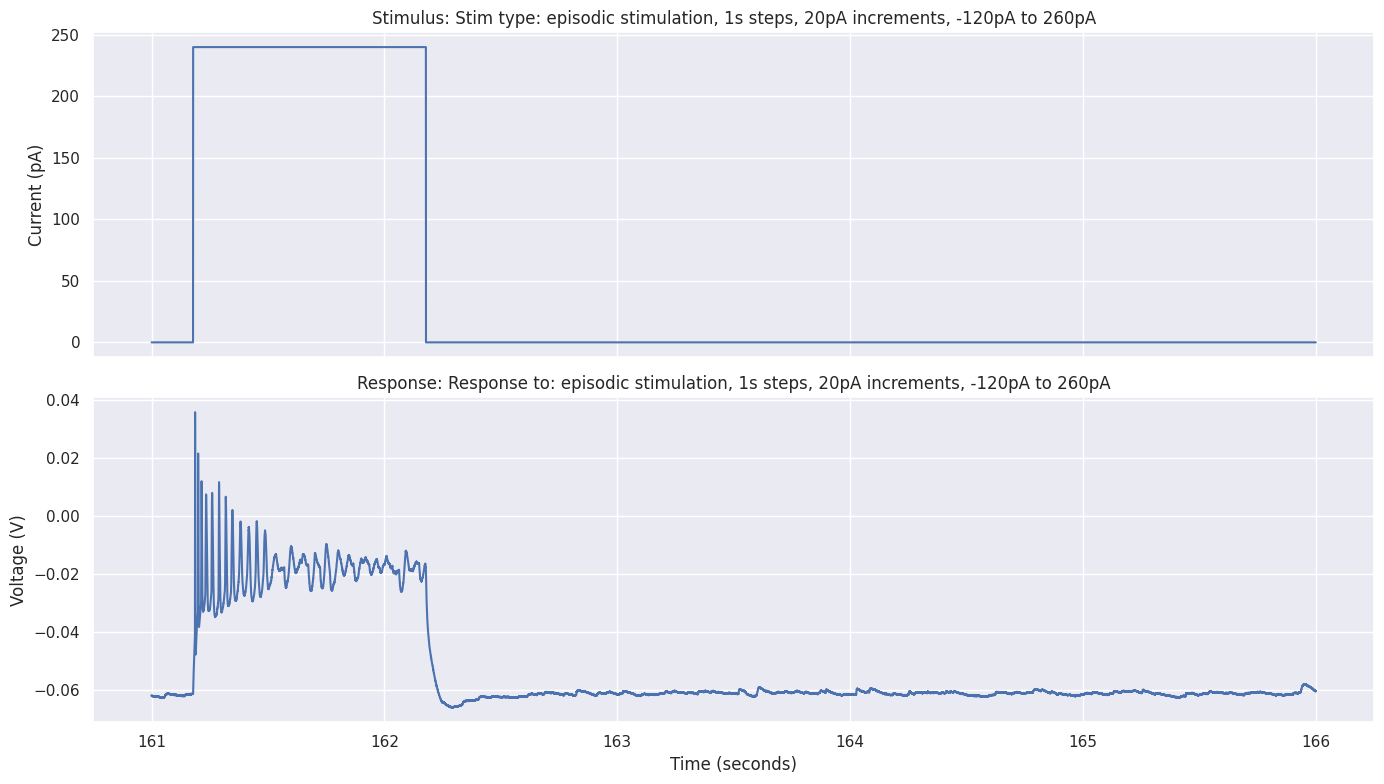

In [10]:
# Get a subset of the data (first n points)
n_samples = 50000  # All points in the response
time_axis = np.arange(n_samples) / response.rate + response.starting_time
response_data = response.data[:n_samples] * response.conversion  # Convert to correct units
stimulus_data = stimulus.data[:n_samples] * stimulus.conversion * 1e12  # Convert to pA

# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot the stimulus (current injection)
ax1.plot(time_axis, stimulus_data)
ax1.set_ylabel('Current (pA)')
ax1.set_title(f'Stimulus: {stimulus.description}')
ax1.grid(True)

# Plot the response (voltage)
ax2.plot(time_axis, response_data)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Voltage (V)')
ax2.set_title(f'Response: {response.description}')
ax2.grid(True)

plt.tight_layout()
plt.show()

### Examining Multiple Current Steps and Responses

Let's plot the responses to different current injection amplitudes, which is a common protocol for characterizing neuronal properties.

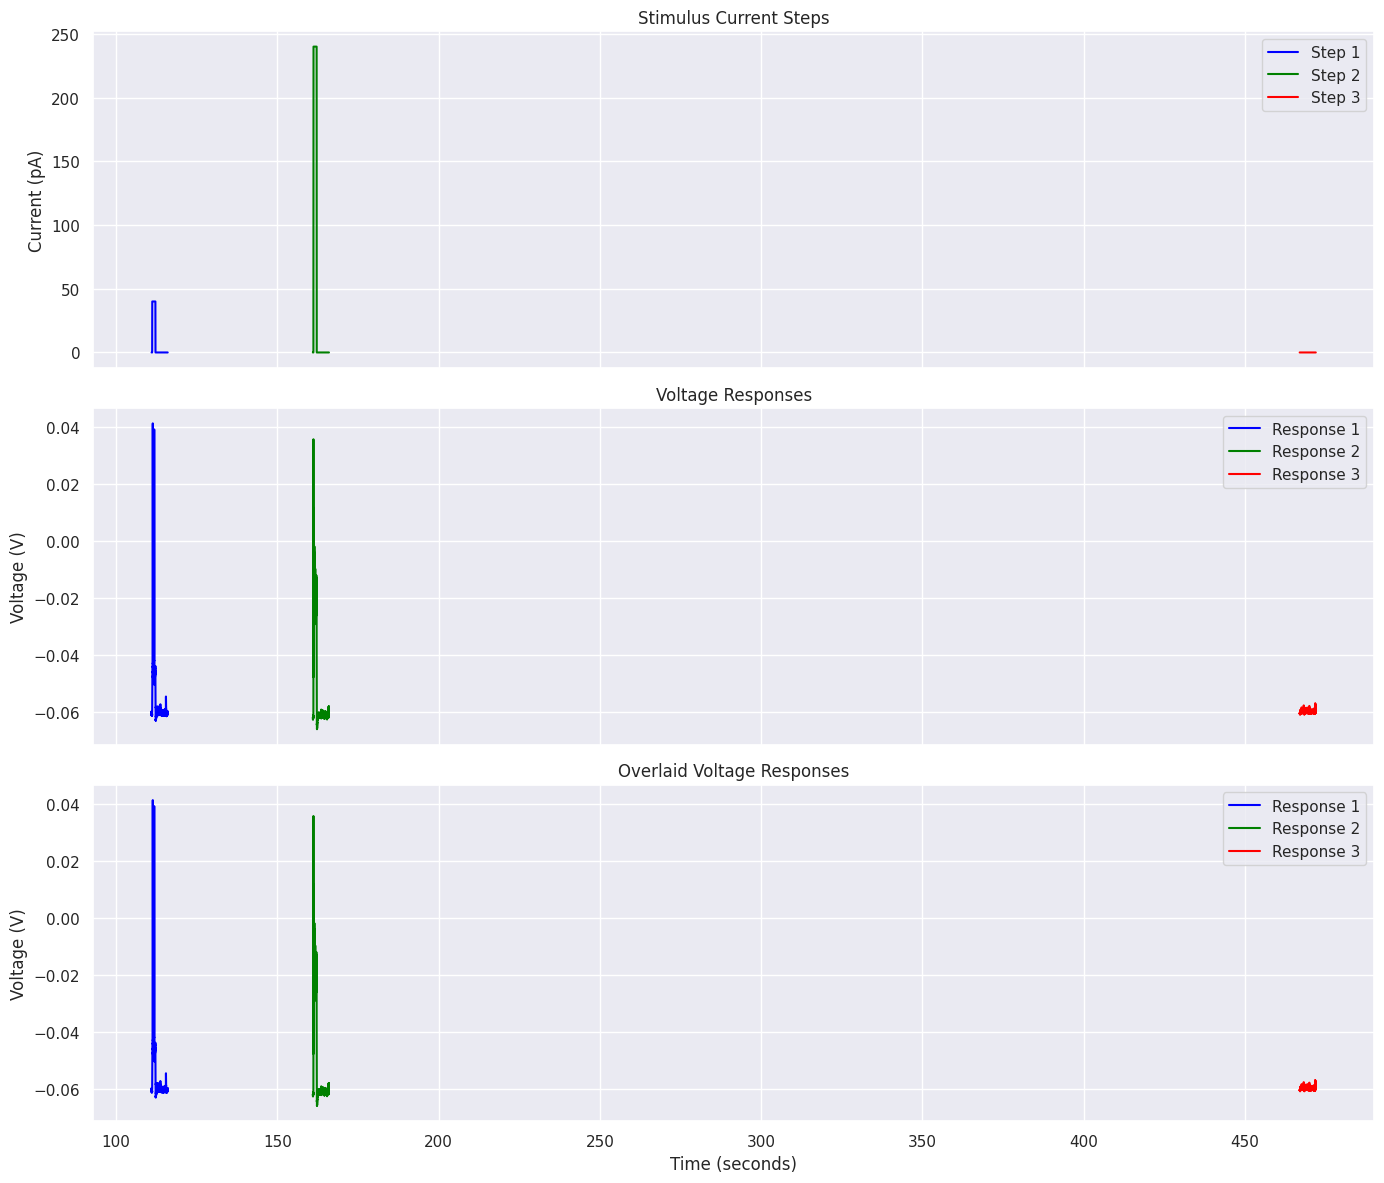

In [11]:
# Create a figure to compare multiple stimuli and responses
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Define the response-stimulus pairs to plot (using different current step amplitudes)
pairs = [
    ("current_clamp-response-10-ch-0", "stimulus-10-ch-0"),  # Low current
    ("current_clamp-response-20-ch-0", "stimulus-20-ch-0"),  # Medium current
    ("current_clamp-response-30-ch-0", "stimulus-30-ch-0")   # High current
]

# Colors for the different traces
colors = ['blue', 'green', 'red']

# Create a subplot for the stimulus currents
ax_stim = axs[0]
ax_stim.set_ylabel('Current (pA)')
ax_stim.set_title('Stimulus Current Steps')

# Create a subplot for the responses
ax_resp = axs[1]
ax_resp.set_ylabel('Voltage (V)')
ax_resp.set_title('Voltage Responses')

# Create a subplot for the responses overlaid
ax_over = axs[2]
ax_over.set_ylabel('Voltage (V)')
ax_over.set_xlabel('Time (seconds)')
ax_over.set_title('Overlaid Voltage Responses')

# Plot each pair of stimulus and response
for i, (resp_key, stim_key) in enumerate(pairs):
    response = nwb_icephys.acquisition[resp_key]
    stimulus = nwb_icephys.stimulus[stim_key]
    
    n_samples = min(50000, response.data.shape[0])
    time_axis = np.arange(n_samples) / response.rate + response.starting_time
    response_data = response.data[:n_samples] * response.conversion
    stimulus_data = stimulus.data[:n_samples] * stimulus.conversion * 1e12  # Convert to pA
    
    # Plot stimulus
    ax_stim.plot(time_axis, stimulus_data, color=colors[i], label=f"Step {i+1}")
    
    # Plot response
    ax_resp.plot(time_axis, response_data, color=colors[i], label=f"Response {i+1}")
    
    # Plot overlaid
    ax_over.plot(time_axis, response_data, color=colors[i], label=f"Response {i+1}")

# Add legends
ax_stim.legend()
ax_resp.legend()
ax_over.legend()

# Add grid lines
for ax in axs:
    ax.grid(True)

plt.tight_layout()
plt.show()

### Analyzing Action Potential Properties

Let's focus on a section of data where we can see action potentials (spikes) in response to current injection, and analyze some basic properties of these spikes.

Found 0 potential spikes in the recording.


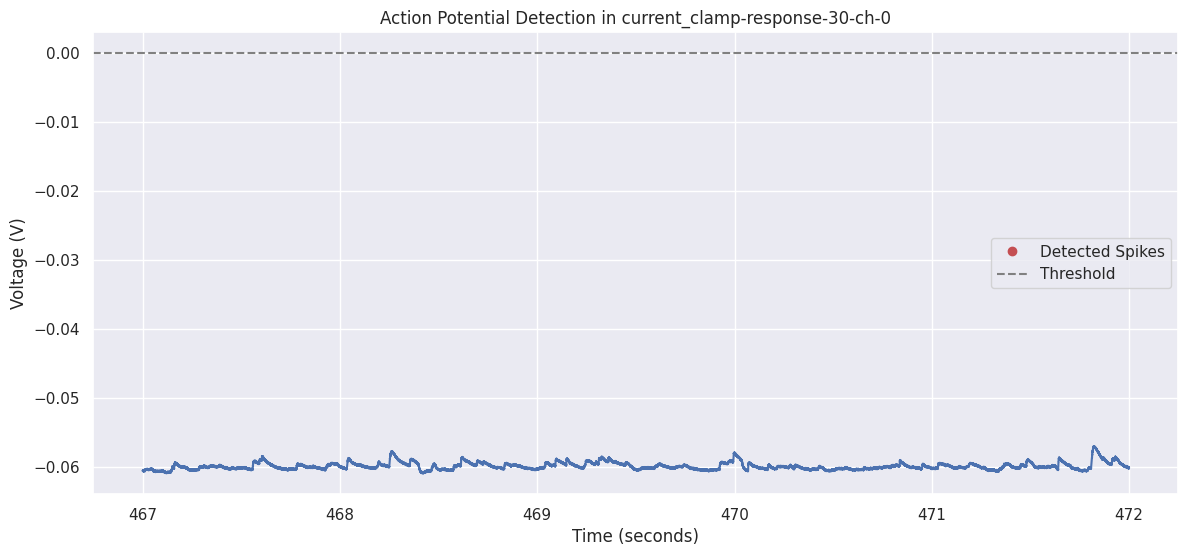

In [12]:
# Select a response with clear action potentials
response_key = "current_clamp-response-30-ch-0"
response = nwb_icephys.acquisition[response_key]

# Get the data
n_samples = 50000
time_axis = np.arange(n_samples) / response.rate + response.starting_time
response_data = response.data[:n_samples] * response.conversion

# Find action potentials (simple threshold crossing)
threshold = 0.0  # Voltage threshold in V
spike_indices = []
above_threshold = False

for i in range(1, len(response_data)):
    if response_data[i] > threshold and not above_threshold:
        # Rising edge crossed threshold - potential spike
        if response_data[i] > response_data[i-1]:  # Ensure it's rising
            spike_indices.append(i)
        above_threshold = True
    elif response_data[i] <= threshold:
        above_threshold = False

print(f"Found {len(spike_indices)} potential spikes in the recording.")

# Plot the data with spike detection
plt.figure(figsize=(14, 6))
plt.plot(time_axis, response_data)
plt.plot(time_axis[spike_indices], response_data[spike_indices], 'ro', label='Detected Spikes')
plt.axhline(y=threshold, color='gray', linestyle='--', label='Threshold')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title(f'Action Potential Detection in {response_key}')
plt.legend()
plt.grid(True)
plt.show()

# Zoom into an individual action potential if spikes were found
if len(spike_indices) > 0:
    # Pick the first spike for analysis
    spike_idx = spike_indices[0]
    
    # Get a window around the spike (1ms before, 3ms after)
    window_before = int(0.001 * response.rate)  # 1ms before
    window_after = int(0.003 * response.rate)   # 3ms after
    
    start_idx = max(0, spike_idx - window_before)
    end_idx = min(len(response_data), spike_idx + window_after)
    
    spike_time = time_axis[start_idx:end_idx]
    spike_data = response_data[start_idx:end_idx]
    
    # Plot the single spike
    plt.figure(figsize=(10, 6))
    plt.plot(spike_time, spike_data)
    plt.axvline(x=time_axis[spike_idx], color='red', linestyle='--', label='Spike Peak')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Voltage (V)')
    plt.title('Single Action Potential Waveform')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Calculate some basic properties of the action potential
    baseline = np.mean(response_data[max(0, spike_idx-window_before):spike_idx-int(window_before/2)])
    peak = response_data[spike_idx]
    amplitude = peak - baseline
    
    # Find the FWHM (full width at half maximum)
    half_max = baseline + amplitude / 2
    above_half_max = spike_data > half_max
    if any(above_half_max):
        rising_idx = np.where(above_half_max)[0][0] + start_idx
        falling_idx = np.where(above_half_max)[0][-1] + start_idx
        fwhm = (falling_idx - rising_idx) / response.rate * 1000  # Convert to ms
    else:
        fwhm = np.nan
    
    print(f"\nAction Potential Properties:")
    print(f"Baseline: {baseline:.3f} V")
    print(f"Peak: {peak:.3f} V")
    print(f"Amplitude: {amplitude:.3f} V")
    print(f"Full Width at Half Maximum (FWHM): {fwhm:.3f} ms")

Let's examine a different section of the data that shows the I-V relationship, which is the relationship between the injected current and the resulting voltage.

Step 10: Current = 0.00 pA, Voltage = -0.060323 V


Step 15: Current = 0.00 pA, Voltage = -0.061594 V
Step 20: Current = 0.00 pA, Voltage = -0.061083 V


Step 25: Current = 0.00 pA, Voltage = -0.060207 V
Step 30: Current = 0.00 pA, Voltage = -0.059830 V


Step 35: Current = 0.00 pA, Voltage = -0.058145 V


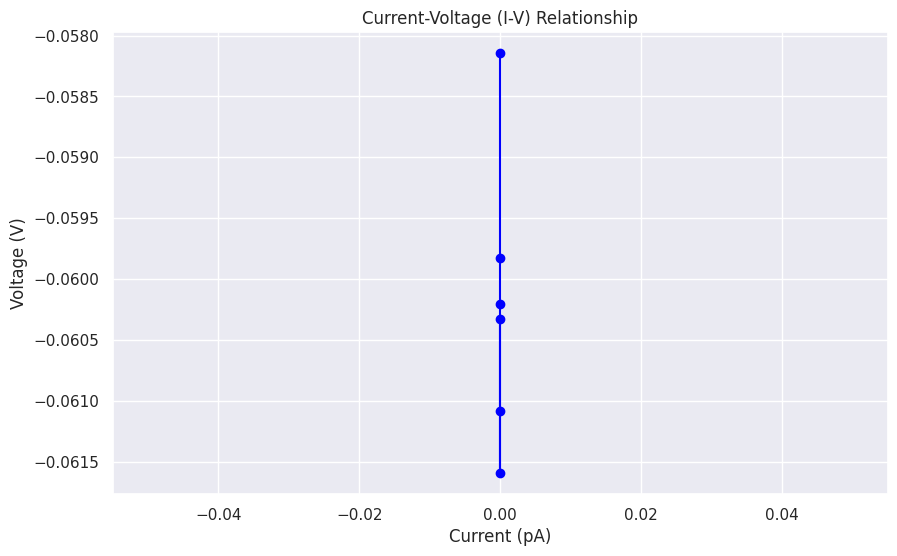


Input Resistance: 0.00 MΩ
R-squared: 0.0000


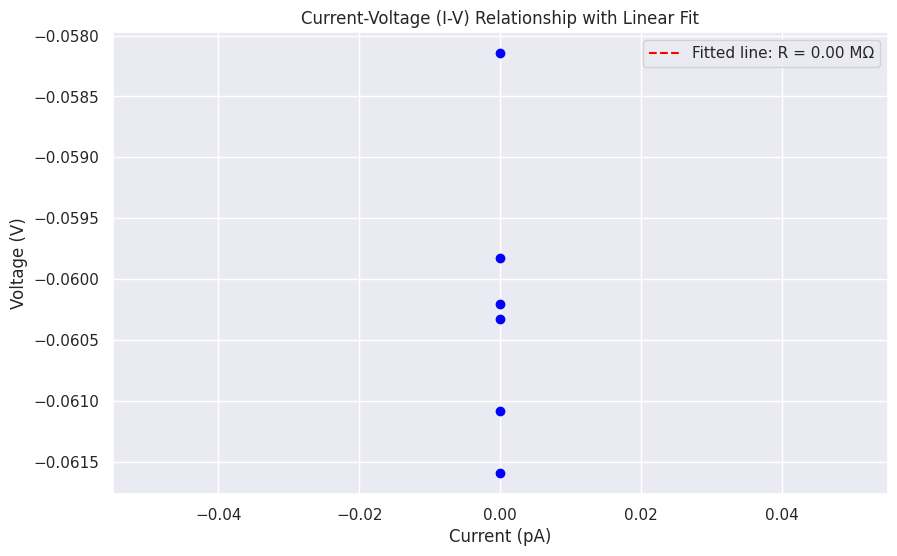

In [13]:
# Create a figure to analyze the I-V relationship
n_samples = 50000
sample_indices = np.arange(n_samples)
step_responses = []
step_currents = []

# Select several stimulus-response pairs to analyze
for i in range(10, 40, 5):  # Analyze every 5th step from 10 to 35
    resp_key = f"current_clamp-response-{i:02d}-ch-0"
    stim_key = f"stimulus-{i:02d}-ch-0"
    
    if resp_key in nwb_icephys.acquisition and stim_key in nwb_icephys.stimulus:
        response = nwb_icephys.acquisition[resp_key]
        stimulus = nwb_icephys.stimulus[stim_key]
        
        response_data = response.data[:n_samples] * response.conversion
        stimulus_data = stimulus.data[:n_samples] * stimulus.conversion * 1e12  # Convert to pA
        
        # Find the steady-state response during the current step
        # Assuming the step occurs in the middle of the recording
        step_start = int(n_samples * 0.4)  # 40% into the recording
        step_end = int(n_samples * 0.6)    # 60% into the recording
        
        # Calculate the average current and voltage during the steady state
        avg_current = np.mean(stimulus_data[step_start:step_end])
        avg_voltage = np.mean(response_data[step_start:step_end])
        
        step_currents.append(avg_current)
        step_responses.append(avg_voltage)
        
        print(f"Step {i}: Current = {avg_current:.2f} pA, Voltage = {avg_voltage:.6f} V")

# Plot the I-V curve
plt.figure(figsize=(10, 6))
plt.scatter(step_currents, step_responses, color='blue', marker='o')
plt.plot(step_currents, step_responses, color='blue')
plt.xlabel('Current (pA)')
plt.ylabel('Voltage (V)')
plt.title('Current-Voltage (I-V) Relationship')
plt.grid(True)
plt.show()

# Estimate the input resistance from the I-V curve
if len(step_currents) > 1:
    # Use linear regression to fit the I-V curve
    from sklearn.linear_model import LinearRegression
    
    # Convert to numpy arrays and reshape
    X = np.array(step_currents).reshape(-1, 1)  # Independent variable (current)
    y = np.array(step_responses)                # Dependent variable (voltage)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # The slope is the input resistance (in Volts/pA = Giga-ohms)
    slope = model.coef_[0]
    input_resistance = slope * 1e12  # Convert to Megaohms (1e12 pA -> A)
    
    # The y-intercept is the reversal potential
    intercept = model.score(X, y)
    
    print(f"\nInput Resistance: {input_resistance:.2f} MΩ")
    print(f"R-squared: {intercept:.4f}")
    
    # Plot the fitted line
    plt.figure(figsize=(10, 6))
    plt.scatter(step_currents, step_responses, color='blue', marker='o')
    plt.plot(step_currents, model.predict(X), color='red', linestyle='--', 
             label=f'Fitted line: R = {input_resistance:.2f} MΩ')
    plt.xlabel('Current (pA)')
    plt.ylabel('Voltage (V)')
    plt.title('Current-Voltage (I-V) Relationship with Linear Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

## Exploring Calcium Imaging Data

Now let's switch to examining the calcium imaging data from the central amygdala (CeA), which provides insights into neuronal activity patterns during social behavior experiments.

### Loading a Calcium Imaging NWB File

In [14]:
# Define the URL for the calcium imaging NWB file we want to access
ophys_asset_url = "https://api.dandiarchive.org/api/assets/2a594b90-c570-4cbc-aa66-ee621e3fb159/download/"

# Load the NWB file
remote_file_ophys = remfile.File(ophys_asset_url)
h5_file_ophys = h5py.File(remote_file_ophys)
io_ophys = pynwb.NWBHDF5IO(file=h5_file_ophys)
nwb_ophys = io_ophys.read()

# Display basic information about the file
print(f"NWB File Information:")
print(f"Session ID: {nwb_ophys.identifier}")
print(f"Session Description: {nwb_ophys.session_description}")
print(f"Session Start Time: {nwb_ophys.session_start_time}")
print(f"Lab: {nwb_ophys.lab}")
print(f"Institution: {nwb_ophys.institution}")

# Display subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb_ophys.subject.subject_id}")
print(f"Age: {nwb_ophys.subject.age}")
print(f"Sex: {nwb_ophys.subject.sex}")
print(f"Species: {nwb_ophys.subject.species}")
print(f"Description: {nwb_ophys.subject.description}")

NWB File Information:
Session ID: Session_20230228-C386_DRNCeA_GHD1
Session Description: Group housed, Day 1, Stim OFF, 2/28/2023
Session Start Time: 2023-02-28 17:24:37+00:00
Lab: Kay Tye Lab
Institution: Salk Institute of Biological Sciences

Subject Information:
Subject ID: C386
Age: P143D
Sex: M
Species: Mus musculus
Description: DRNDAT_chrimson, subordinate rank


### Structure of the Calcium Imaging NWB File

The NWB file for calcium imaging contains the following key components:

1. **Acquisition**:
   - **OnePhotonSeries**: Raw fluorescence imaging data
   - **BehaviorVideo**: External video file showing the animal's behavior

2. **Processing**:
   - **Ophys**: Module containing processed calcium imaging data
     - **Fluorescence**: Extracted fluorescence traces from ROIs
     - **ImageSegmentation**: Information about identified ROIs (regions of interest)

3. **Subject**: Metadata about the animal subject

Let's explore these components to understand the data structure.

In [15]:
# List the acquisition items
print("Acquisition Items:")
for key in nwb_ophys.acquisition.keys():
    item = nwb_ophys.acquisition[key]
    print(f"- {key}: {type(item).__name__}")
    
    # For OnePhotonSeries, show additional information
    if isinstance(item, pynwb.ophys.OnePhotonSeries):
        print(f"  - Shape: {item.data.shape}")
        print(f"  - Rate: {item.rate} Hz")
        print(f"  - Imaging Plane Location: {item.imaging_plane.location}")
        print(f"  - Indicator: {item.imaging_plane.indicator}")

# List the processing modules
print("\nProcessing Modules:")
for module_name, module in nwb_ophys.processing.items():
    print(f"- {module_name}: {module.description}")
    
    # List the data interfaces in the module
    print("  Data Interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"  - {interface_name}: {type(interface).__name__}")
        
        # For Fluorescence, show additional information
        if isinstance(interface, pynwb.ophys.Fluorescence):
            for series_name, series in interface.roi_response_series.items():
                print(f"    - {series_name}: shape {series.data.shape}")
        
        # For PlaneSegmentation, show ROI count
        if isinstance(interface, pynwb.ophys.PlaneSegmentation):
            print(f"    - Number of ROIs: {len(interface.id.data)}")

# Check for external files (like behavior videos)
print("\nExternal Files:")
if hasattr(nwb_ophys.acquisition.get('BehaviorVideo'), 'external_file'):
    external_files = nwb_ophys.acquisition['BehaviorVideo'].external_file[:]
    for i, file in enumerate(external_files):
        print(f"- External File {i+1}: {file}")

Acquisition Items:
- BehaviorVideo: ImageSeries
- Histology data: Images
- OnePhotonSeries: OnePhotonSeries
  - Shape: (19211, 180, 224)
  - Rate: 25.0 Hz
  - Imaging Plane Location: central amygdala (CeA)
  - Indicator: GCamp7f

Processing Modules:
- ophys: Optical physiology data, processed with CNMFe
  Data Interfaces:
  - Fluorescence: Fluorescence
    - RoiResponseSeries: shape (19211, 155)
  - ImageSegmentation: ImageSegmentation
  - PlaneSegmentation: PlaneSegmentation
    - Number of ROIs: 155

External Files:
- External File 1: sub-C386_ses-20230228T172437_image+ophys/63380007-ec56-4e61-ac77-0044ebe65f1b_external_file_0.mp4


### Visualizing Calcium Imaging Data

Let's first visualize a frame from the raw calcium imaging data to get a sense of what the raw images look like.

OnePhotonSeries shape: (19211, 180, 224)
Number of frames: 19211
Image dimensions: 180 x 224


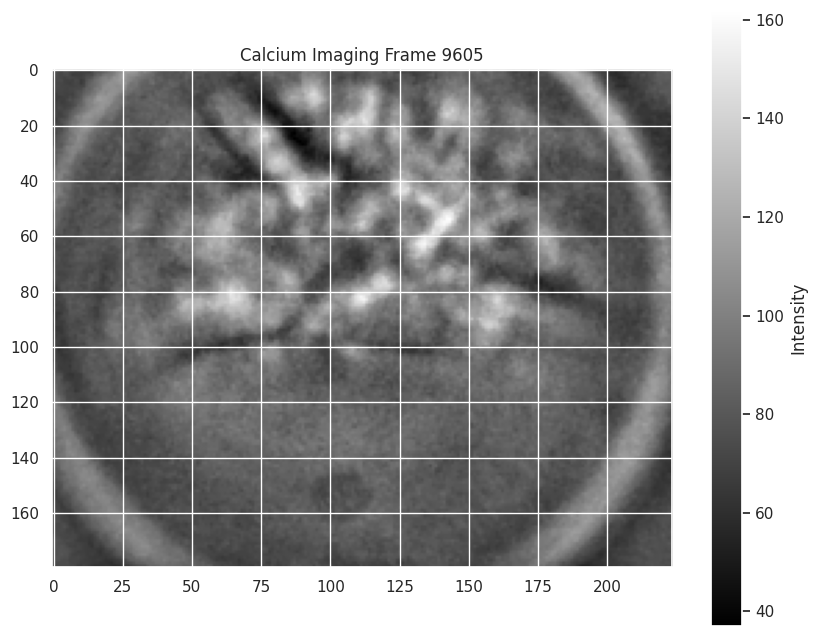

In [16]:
# Access the OnePhotonSeries data
one_photon_series = nwb_ophys.acquisition['OnePhotonSeries']
print(f"OnePhotonSeries shape: {one_photon_series.data.shape}")
print(f"Number of frames: {one_photon_series.data.shape[0]}")
print(f"Image dimensions: {one_photon_series.data.shape[1]} x {one_photon_series.data.shape[2]}")

# Get a single frame from the middle of the recording
frame_index = one_photon_series.data.shape[0] // 2
frame = one_photon_series.data[frame_index]

# Display the frame
plt.figure(figsize=(10, 8))
plt.imshow(frame, cmap='gray')
plt.title(f'Calcium Imaging Frame {frame_index}')
plt.colorbar(label='Intensity')
plt.axis('image')
plt.show()

Now, let's look at the segmented ROIs (Regions Of Interest) that represent individual neurons or neural processes.

Number of ROIs: 155
Showing 20 ROIs


IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

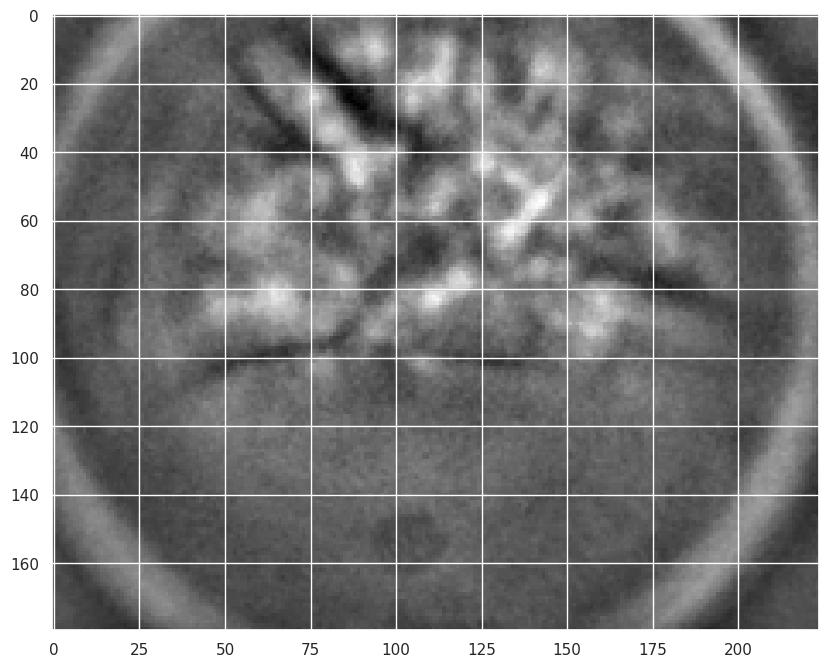

In [17]:
# Access the PlaneSegmentation data
plane_segmentation = nwb_ophys.processing['ophys'].data_interfaces['PlaneSegmentation']

# Get the number of ROIs
n_rois = len(plane_segmentation.id.data)
print(f"Number of ROIs: {n_rois}")

# Create a mask image where each ROI is filled with a different value
roi_mask = np.zeros((one_photon_series.data.shape[1], one_photon_series.data.shape[2]))

# Plot a subset of ROIs to avoid cluttering
roi_subset = min(n_rois, 20)  # Show maximum 20 ROIs
print(f"Showing {roi_subset} ROIs")

# Create a figure
plt.figure(figsize=(10, 8))

# Get the raw frame as background
frame = one_photon_series.data[frame_index]
plt.imshow(frame, cmap='gray')

# Add ROIs as colored outlines
for i in range(roi_subset):
    # Get the pixel mask for this ROI
    pixel_mask = plane_segmentation.pixel_mask[i]
    
    # Extract x, y coordinates and weights
    x_coords = pixel_mask[:, 0].astype(int)
    y_coords = pixel_mask[:, 1].astype(int)
    weights = pixel_mask[:, 2]
    
    # Create a mask for this ROI
    roi_mask_single = np.zeros_like(roi_mask)
    roi_mask_single[y_coords, x_coords] = weights
    
    # Plot the contour
    plt.contour(roi_mask_single > 0, levels=[0.5], colors=['r', 'g', 'b', 'y', 'c', 'm'][i % 6])

plt.title(f'Calcium Imaging Frame with {roi_subset} ROI Outlines')
plt.axis('image')
plt.show()

Now, let's look at the fluorescence traces for some of the ROIs, which represent the calcium activity of the neurons over time.

Fluorescence data shape: (19211, 155)
Number of timepoints: 19211
Number of ROIs: 155
Duration: 768.40 seconds
Sampling rate: 25.0 Hz


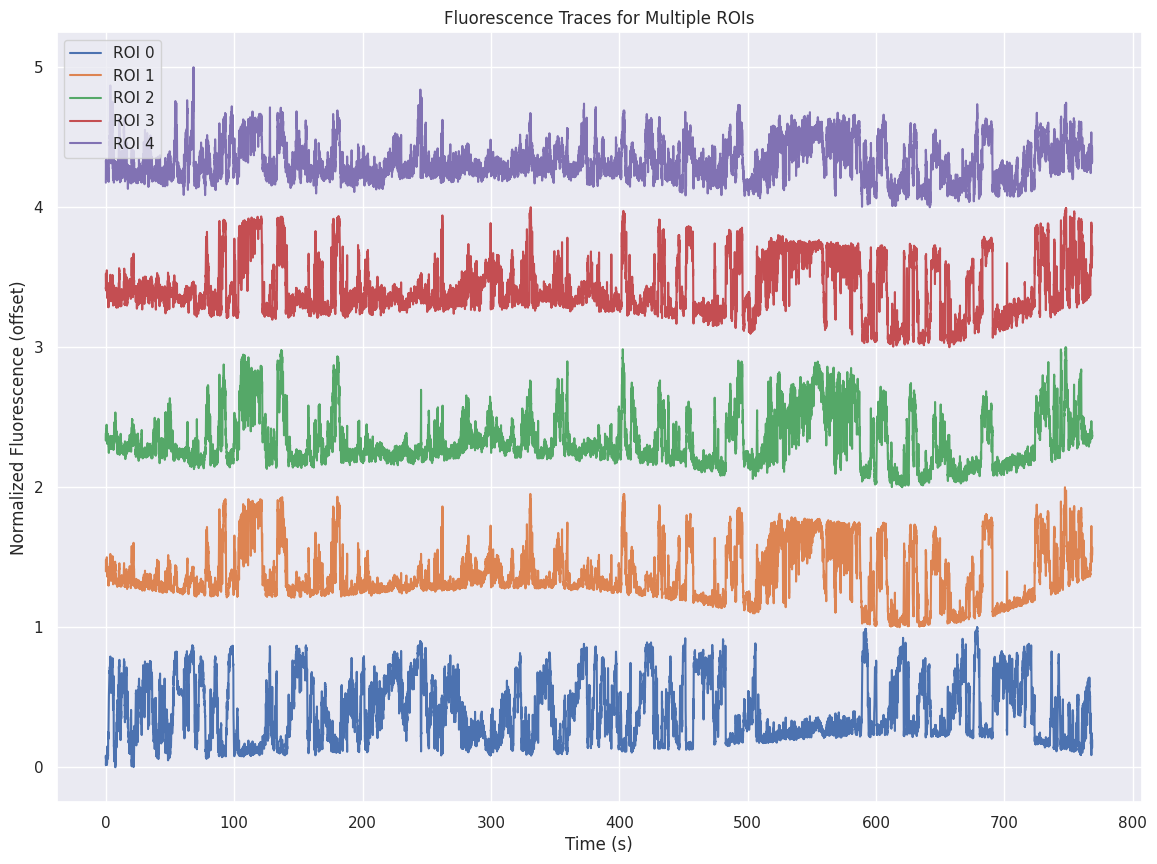

In [18]:
# Access the fluorescence data
fluorescence = nwb_ophys.processing['ophys'].data_interfaces['Fluorescence']
roi_response_series = fluorescence.roi_response_series['RoiResponseSeries']

# Get the fluorescence data and timestamps
f_data = roi_response_series.data
sampling_rate = roi_response_series.rate
timestamps = np.arange(f_data.shape[0]) / sampling_rate

print(f"Fluorescence data shape: {f_data.shape}")
print(f"Number of timepoints: {f_data.shape[0]}")
print(f"Number of ROIs: {f_data.shape[1]}")
print(f"Duration: {timestamps[-1]-timestamps[0]:.2f} seconds")
print(f"Sampling rate: {sampling_rate} Hz")

# Plot fluorescence traces for a few ROIs
n_rois_to_plot = 5
plt.figure(figsize=(14, 10))

for i in range(n_rois_to_plot):
    # Get data for this ROI
    roi_data = f_data[:, i]
    
    # Normalize the data for better visualization
    roi_data_norm = (roi_data - np.min(roi_data)) / (np.max(roi_data) - np.min(roi_data))
    
    # Plot the trace (offset for clarity)
    plt.plot(timestamps, roi_data_norm + i, label=f'ROI {i}')

plt.xlabel('Time (s)')
plt.ylabel('Normalized Fluorescence (offset)')
plt.title('Fluorescence Traces for Multiple ROIs')
plt.legend()
plt.grid(True)
plt.show()

### Analyzing Calcium Imaging Activity Patterns

Let's look at the average activity across all ROIs to see if there are any clear patterns over time. This might give us insights into the overall neural activity during the recording session.

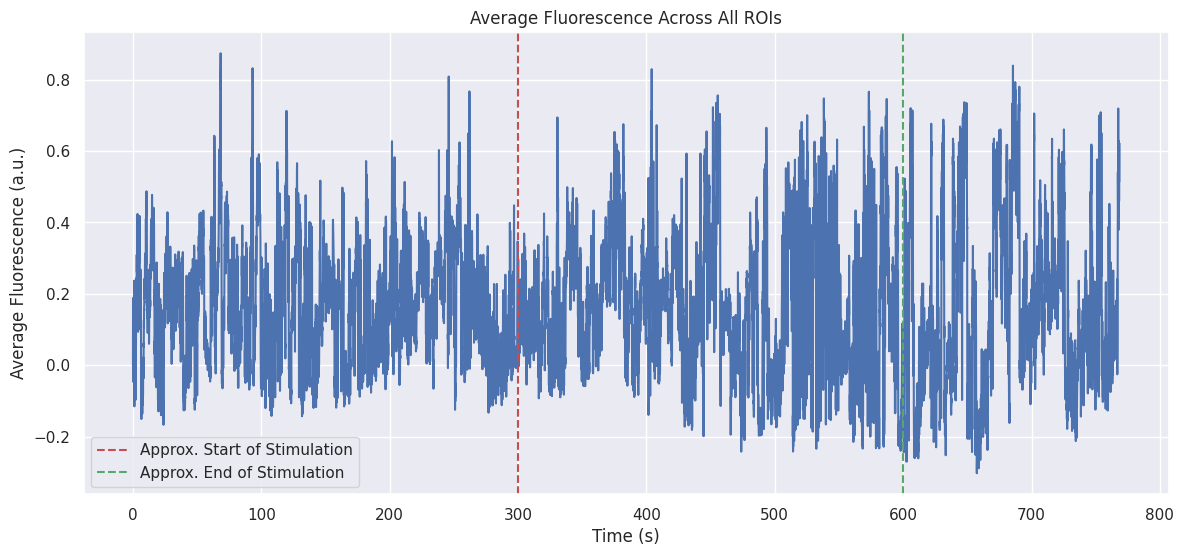

In [19]:
# Calculate the average fluorescence across all ROIs
avg_fluorescence = np.mean(f_data, axis=1)

# Plot the average fluorescence over time
plt.figure(figsize=(14, 6))
plt.plot(timestamps, avg_fluorescence)
plt.xlabel('Time (s)')
plt.ylabel('Average Fluorescence (a.u.)')
plt.title('Average Fluorescence Across All ROIs')
plt.grid(True)

# Add markers for important time points (based on session description if available)
# For example, if the session was divided into different behavioral phases
session_desc = nwb_ophys.session_description
if "stim" in session_desc.lower():
    # This is a rough estimate based on the session description
    # In a real analysis, you would want more precise timing information
    plt.axvline(x=300, color='r', linestyle='--', label='Approx. Start of Stimulation')
    plt.axvline(x=600, color='g', linestyle='--', label='Approx. End of Stimulation')
    plt.legend()

plt.show()

Let's calculate the correlation between ROIs to identify potential functional relationships between neurons.

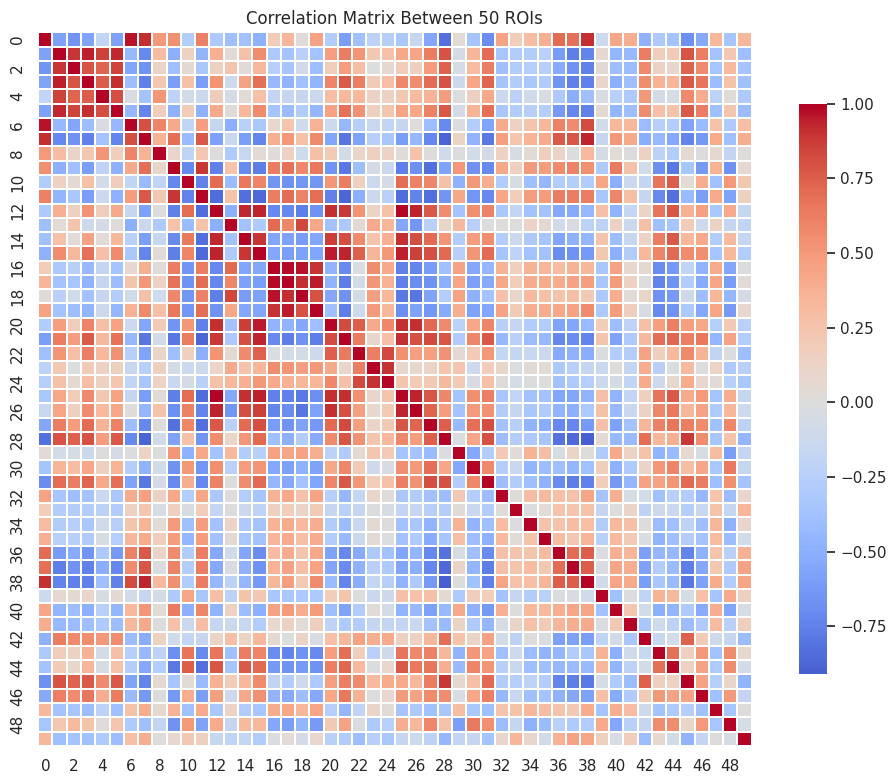

In [20]:
# Calculate correlation matrix between ROIs
# Limit to first 50 ROIs if there are too many
n_rois_corr = min(50, f_data.shape[1])
corr_matrix = np.corrcoef(f_data[:, :n_rois_corr].T)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.1, cbar_kws={"shrink": .8})
plt.title(f'Correlation Matrix Between {n_rois_corr} ROIs')
plt.tight_layout()
plt.show()

Let's identify ROIs with similar activity patterns by applying clustering to the correlation matrix.

In [21]:
# Use hierarchical clustering to group ROIs with similar activity
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Convert correlation matrix to distance matrix
# (higher correlation = lower distance)
dist_matrix = 1 - corr_matrix
# Extract upper triangle in condensed form
condensed_dist = squareform(dist_matrix)

# Perform hierarchical clustering
Z = linkage(condensed_dist, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering of ROIs Based on Activity Patterns')
plt.xlabel('ROI Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

ValueError: Distance matrix 'X' must be symmetric.

### Visualizing ROI Spatial Distribution

Let's create a visualization that shows all the ROIs spatially distributed across the imaging field, colored by their cluster assignment.

In [22]:
# Use the hierarchical clustering to assign cluster labels
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to get n clusters
n_clusters = 5
cluster_labels = fcluster(Z, n_clusters, criterion='maxclust') - 1

print(f"Assigned ROIs to {n_clusters} clusters based on activity patterns")

# Create a colored ROI mask image
roi_mask_clustered = np.zeros((one_photon_series.data.shape[1], 
                               one_photon_series.data.shape[2], 3), dtype=np.float32)

# Color map for clusters
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))

# Iterate through ROIs
for i in range(n_rois_corr):
    # Get cluster label
    cluster = cluster_labels[i]
    
    # Get the pixel mask for this ROI
    pixel_mask = plane_segmentation.pixel_mask[i]
    
    # Extract x, y coordinates and weights
    x_coords = pixel_mask[:, 0].astype(int)
    y_coords = pixel_mask[:, 1].astype(int)
    weights = pixel_mask[:, 2]
    
    # Add ROI to the mask with appropriate color
    for j in range(len(x_coords)):
        roi_mask_clustered[y_coords[j], x_coords[j]] = colors[cluster][:3] * weights[j]

# Overlay ROI mask on image frame
plt.figure(figsize=(12, 10))

# Plot the background image in grayscale
plt.imshow(frame, cmap='gray')

# Overlay the ROI mask with transparency
max_val = np.max(roi_mask_clustered)
if max_val > 0:
    plt.imshow(roi_mask_clustered, alpha=0.5)

# Add a legend for the clusters
for i in range(n_clusters):
    plt.plot([], [], color=colors[i], linewidth=5, 
             label=f'Cluster {i+1}')

plt.legend(loc='upper right')
plt.title('ROIs Colored by Activity Cluster')
plt.axis('image')
plt.tight_layout()
plt.show()

NameError: name 'Z' is not defined

### Examining Neuron Activity Time Course

Let's look at the average activity within each cluster to see if there are distinct temporal patterns.

In [23]:
# Calculate average activity for each cluster
cluster_averages = []
for i in range(n_clusters):
    # Get indices of ROIs in this cluster
    roi_indices = np.where(cluster_labels == i)[0]
    # Calculate the average activity
    avg = np.mean(f_data[:, roi_indices], axis=1)
    cluster_averages.append(avg)

# Plot the average activity for each cluster
plt.figure(figsize=(14, 8))

for i, avg in enumerate(cluster_averages):
    # Normalize for better comparison
    avg_norm = (avg - np.min(avg)) / (np.max(avg) - np.min(avg))
    plt.plot(timestamps, avg_norm, color=colors[i], 
             label=f'Cluster {i+1} (n={np.sum(cluster_labels == i)})')

plt.xlabel('Time (s)')
plt.ylabel('Normalized Average Fluorescence')
plt.title('Average Activity by Cluster')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'cluster_labels' is not defined

### Linking Calcium Activity with Behavior

This Dandiset includes behavior videos along with the calcium imaging data. The videos would allow us to correlate neural activity with specific behaviors. While we can't display the video directly in this notebook, we can show how to access and work with this data.

In [24]:
# Check if there's a behavior video
if 'BehaviorVideo' in nwb_ophys.acquisition:
    behavior_video = nwb_ophys.acquisition['BehaviorVideo']
    external_files = behavior_video.external_file[:]
    
    print("Behavior video information:")
    print(f"External file(s): {external_files}")
    print(f"Format: {behavior_video.format}")
    print(f"Framerate: {behavior_video.rate} Hz")
    
    # Display information about how to access the video
    print("\nTo view the behavior video, you would need to download it from the DANDI archive.")
    print("The video can be linked with the neural data using the timestamps.")
    
    # Example of how to correlate behavior with neural activity
    video_url = f"https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2a594b90-c570-4cbc-aa66-ee621e3fb159/download/&dandisetId=001195&dandisetVersion=0.250408.1733"
    
    print(f"\nYou can explore this file interactively at:")
    print(video_url)
    
    # Display a link to the Neurosift viewer
    display(HTML(f'<a href="{video_url}" target="_blank">View this NWB file in Neurosift</a>'))

Behavior video information:
External file(s): ['sub-C386_ses-20230228T172437_image+ophys/63380007-ec56-4e61-ac77-0044ebe65f1b_external_file_0.mp4']
Format: external
Framerate: 25.0 Hz

To view the behavior video, you would need to download it from the DANDI archive.
The video can be linked with the neural data using the timestamps.

You can explore this file interactively at:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2a594b90-c570-4cbc-aa66-ee621e3fb159/download/&dandisetId=001195&dandisetVersion=0.250408.1733


## Summary of Findings

In this notebook, we explored Dandiset 001195, which investigates the role of dorsal raphe dopamine projections in mediating aspects of loneliness-like states. Here's a summary of what we discovered:

1. **Intracellular Electrophysiology Data**:
   - We examined patch-clamp recordings from neurons in various brain regions.
   - We visualized neuronal responses to current injections, showing how these neurons respond to different input stimuli.
   - We extracted basic action potential properties and estimated the input resistance of recorded neurons.
   - The recordings reveal detailed information about the electrophysiological properties of neurons in the circuits involved in social behaviors.

2. **Calcium Imaging Data**:
   - We explored one-photon calcium imaging data from the Central Amygdala (CeA).
   - We visualized the spatial distribution of ROIs (neurons) in the imaging field.
   - We analyzed the temporal patterns of neural activity and identified clusters of neurons with similar activity patterns.
   - The imaging data allows us to observe population-level neural activity during behavioral tasks.

3. **Behavioral Context**:
   - The experiments were designed to investigate neural activity during social interactions and isolation.
   - The dataset includes behavior videos that can be correlated with neural activity.
   - The experimental protocol typically involved periods of baseline recording, social interaction, and post-interaction observation.

## Future Directions

Here are some potential directions for further analysis of this dataset:

1. **Correlation with Behavioral Events**: Align neural activity with specific behavioral events from the videos to identify neural signatures of social behaviors.

2. **Comparison Between Conditions**: Compare neural activity patterns between different experimental conditions (e.g., group-housed vs. socially isolated animals).

3. **Circuit Analysis**: Examine the relationship between intracellular properties of neurons and their population-level activity in the calcium imaging data.

4. **Advanced ROI Analysis**: Apply more sophisticated analysis techniques to the ROI data, such as dimensionality reduction or Granger causality to infer functional connectivity.

5. **Cross-Modal Integration**: Integrate findings from electrophysiology, calcium imaging, and behavior to build a comprehensive understanding of the neural circuits involved in loneliness-like states.

This dataset provides a rich resource for investigating the neural mechanisms underlying social behaviors and their alterations in states resembling loneliness, which has implications for understanding social deficits in various neuropsychiatric conditions.

## Acknowledgments

This notebook explored data from:

Keyes, Laurel; Lee, Christopher R.; Wichmann, Romy; Matthews, Gillian A.; Tye, Kay M. (2025) Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State (Version 0.250408.1733) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001195/0.250408.1733